In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df=pd.read_csv('C:/Users/Sumit/Downloads/USA_GDP_TIME_SERIES.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   YEARS                               63 non-null     int64  
 1   GDP per capita (constant 2015 US$)  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df['log_GDP']=np.log(df['GDP per capita (constant 2015 US$)'])

In [6]:
df.describe()

,YEARS,GDP per capita (constant 2015 US$),log_GDP
count,63.000000,63.000000,63.000000
mean,1991.000000,40172.301052,10.544309
std,18.330303,13070.714607,0.347295
min,1960.000000,19135.268180,9.859288
25%,1975.500000,28348.802190,10.252306
50%,1991.000000,39303.489010,10.579069
75%,2006.500000,52876.597795,10.875715
max,2022.000000,62866.714390,11.048772


# PLOTTING THE TIME SERIES DATA OF US GDP

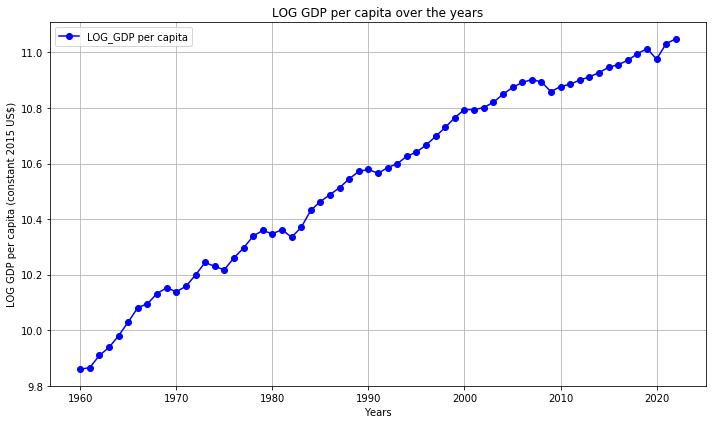

In [7]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the data points as a line plot
plt.plot(df.YEARS,df.log_GDP, marker='o', linestyle='-', color='b', label='LOG_GDP per capita')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('LOG GDP per capita (constant 2015 US$)')
plt.title('LOG GDP per capita over the years')
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Show the legend

# Optionally, adjust the plot limits if needed
# plt.xlim(1960, 2022)
# plt.ylim(0, max(gdp_per_capita) * 1.1)

# Show the plot
plt.tight_layout()  # Ensure all elements are visible
plt.show()



## Filter the series using Hodrick-Prescott filter (HP filter)

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter
log_gdp_cycle,log_gdp_trend = hpfilter(df['log_GDP'], lamb=6.25) #Use 6.25 as the smoothing parameter since this is yearly data

gdp_segr = df[['log_GDP']]
gdp_segr['YEARS'] = df['YEARS']
gdp_segr['epsilon_t']= log_gdp_cycle
gdp_segr['trend_t'] = log_gdp_trend
gdp_segr

C:\Users\Sumit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,log_GDP,YEARS,epsilon_t,trend_t
0,9.859288,1960,0.013764,9.845525
1,9.865451,1961,-0.012229,9.877680
2,9.909282,1962,-0.002755,9.912037
3,9.937950,1963,-0.010892,9.948842
4,9.980440,1964,-0.007459,9.987899
...,...,...,...,...
58,10.995535,2018,0.009652,10.985883
59,11.013666,2019,0.015275,10.998391
60,10.975954,2020,-0.034596,11.010551
61,11.032141,2021,0.006309,11.025833


# PLOTTING THE SERIES OF RESIDUALS

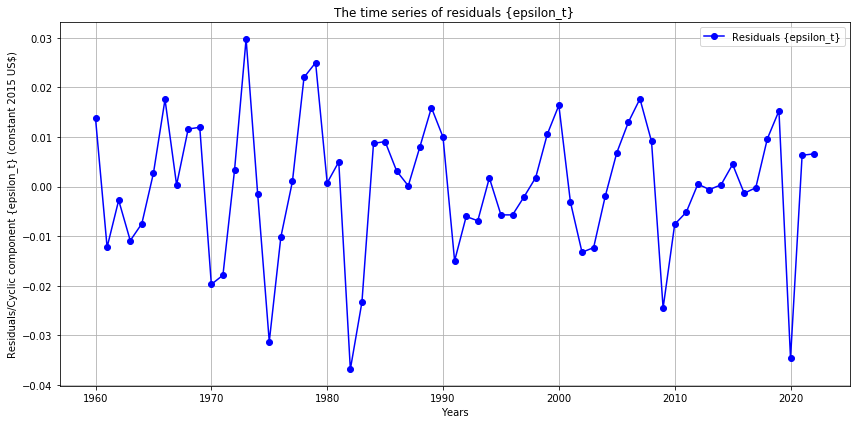

In [9]:
# Create the plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the data points as a line plot
plt.plot(gdp_segr.YEARS,gdp_segr.epsilon_t, marker='o', linestyle='-', color='b', label='Residuals {epsilon_t}')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Residuals/Cyclic component {epsilon_t} (constant 2015 US$)')
plt.title('The time series of residuals {epsilon_t}')
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Show the legend

# Show the plot
plt.tight_layout()  # Ensure all elements are visible
plt.show()

## Plotting empirical autocorrelation function (ACF) and partial autocorrelation function (PACF) of {epsilon_t}.

C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Sumit\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


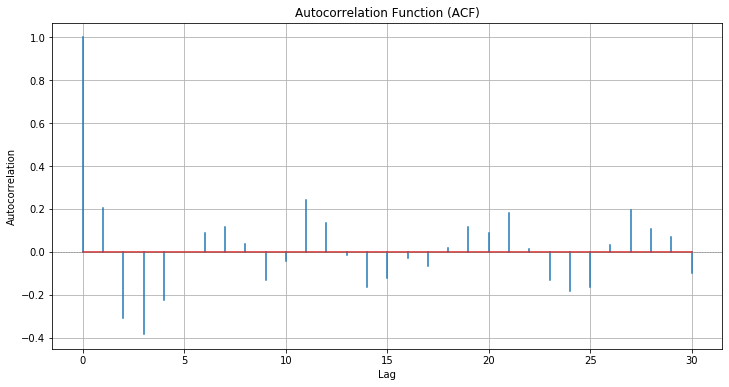

C:\Users\Sumit\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


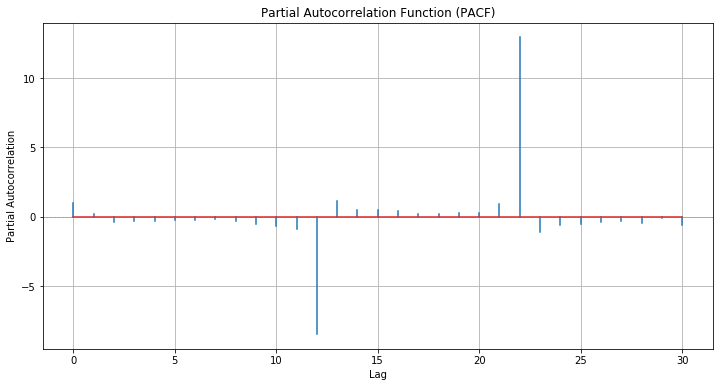

In [10]:
import statsmodels.api as sm

# Calculate ACF and PACF
acf_values, confint_acf = sm.tsa.stattools.acf(gdp_segr['epsilon_t'], nlags=30, fft=True, alpha=0.05)
pacf_values, confint_pacf = sm.tsa.stattools.pacf(gdp_segr['epsilon_t'], nlags=30, alpha=0.05)

# Plot ACF
plt.figure(figsize=(12, 6))
plt.stem(acf_values, markerfmt=' ')
plt.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plt.stem(pacf_values, markerfmt=' ')
plt.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

In [11]:

# Initialize AIC matrix
p_values = range(10)
q_values = range(10)
aic_matrix = [[0 for _ in range(10)] for _ in range(10)]

# Iterate through different combinations of p and q
for p in p_values:
    for q in q_values:
        try:
            # Estimate ARMA(p,q) model
            arma_model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(p, q))
            arma_result = arma_model.fit()

            # Compute AIC
            aic_value = arma_result.aic

            # Store AIC in the matrix
            aic_matrix[p][q] = aic_value
        except:
            # In case of convergence issues, store AIC as None
            aic_matrix[p][q] = None

# Convert the matrix to a DataFrame for better visualization
aic_df = pd.DataFrame(aic_matrix, index=p_values, columns=q_values)
print(aic_df)

C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-package

            0           1           2           3           4           5   6  \
0 -359.809105 -363.200853 -380.255379 -382.428368 -381.661308         NaN NaN   
1 -360.539828 -361.593892         NaN         NaN         NaN         NaN NaN   
2 -367.835276 -389.840413         NaN         NaN         NaN         NaN NaN   
3 -370.771766 -388.848020 -387.163229         NaN         NaN         NaN NaN   
4 -372.482005 -388.181872 -387.093091         NaN         NaN         NaN NaN   
5 -372.471438 -387.147266 -385.707813         NaN         NaN         NaN NaN   
6 -373.489683 -387.017626 -385.512399 -385.772401 -384.095782         NaN NaN   
7 -372.294992 -385.947661 -384.456392 -385.332808 -383.073177         NaN NaN   
8 -373.105336 -387.157342 -384.289810 -381.291428 -381.744214 -383.969422 NaN   
9 -379.308940 -386.981140 -385.179636 -385.299380         NaN         NaN NaN   

            7           8           9  
0 -391.000495 -387.116198 -389.836474  
1         NaN         NaN   

In [12]:
aic_df[1][2]

-389.84041261308096

In [13]:
# Specify the order (p, q)
p, q = 2, 1

# Fit ARMA model
arma_model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(p, q))
arma_result = arma_model.fit()

# Calculate AIC, BIC, and HQIC
aic = arma_result.aic
bic = arma_result.bic
hqic = arma_result.hqic

print("AIC:", aic)
print("BIC:", bic)
print("HQIC:", hqic)

AIC: -389.84041261308096
BIC: -379.1247389811233
HQIC: -385.62588579699434


<Figure size 1728x864 with 0 Axes>

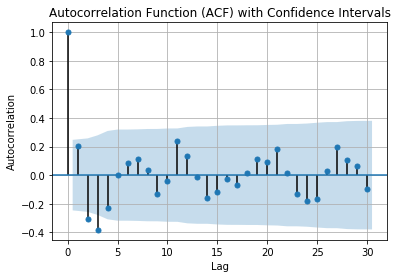

C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 1728x864 with 0 Axes>

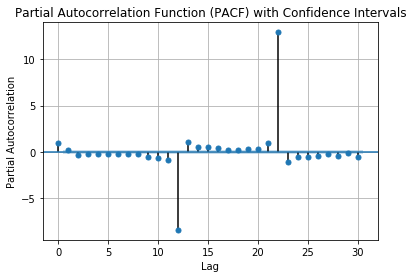

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF with confidence intervals
plt.figure(figsize=(24,12))
plot_acf(gdp_segr['epsilon_t'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) with Confidence Intervals')
plt.grid(True)
plt.show()

# Plot PACF with confidence intervals
plt.figure(figsize=(24, 12))
plot_pacf(gdp_segr['epsilon_t'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) with Confidence Intervals')
plt.grid(True)
plt.show()

In [15]:

# Initialize BIC matrix
p_values = range(10)
q_values = range(10)
bic_matrix = [[0 for _ in range(10)] for _ in range(10)]

# Iterate through different combinations of p and q
for p in p_values:
    for q in q_values:
        try:
            # Estimate ARMA(p,q) model
            arma_model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(p, q))
            arma_result = arma_model.fit()

            # Compute BIC
            bic_value = arma_result.bic

            # Store BIC in the matrix
            bic_matrix[p][q] = bic_value
        except:
            # In case of convergence issues, store AIC as None
            bic_matrix[p][q] = None

# Convert the matrix to a DataFrame for better visualization
bic_df = pd.DataFrame(bic_matrix, index=p_values, columns=q_values)
print(bic_df)

C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-package

            0           1           2           3           4           5   6  \
0 -355.522836 -356.771449 -371.682840 -371.712694 -368.802500         NaN NaN   
1 -354.110424 -353.021353         NaN         NaN         NaN         NaN NaN   
2 -359.262737 -379.124739         NaN         NaN         NaN         NaN NaN   
3 -360.056092 -375.989212 -372.161286         NaN         NaN         NaN NaN   
4 -359.623196 -373.179929 -369.948013         NaN         NaN         NaN NaN   
5 -357.469495 -370.002188 -366.419601         NaN         NaN         NaN NaN   
6 -356.344605 -367.729413 -364.081052 -362.197919 -358.378166         NaN NaN   
7 -353.006779 -364.516314 -360.881910 -359.615191 -355.212425         NaN NaN   
8 -351.673988 -363.582860 -358.572193 -353.430677 -351.740328 -351.822401 NaN   
9 -355.734458 -361.263524 -357.318885 -355.295494         NaN         NaN NaN   

            7          8           9  
0 -371.712282 -365.68485 -366.261992  
1         NaN        NaN      

In [16]:
bic_df # model selection will be ARMA(2,1)

,0,1,2,3,4,5,6,7,8,9
0,-355.522836,-356.771449,-371.682840,-371.712694,-368.802500,NaN,NaN,-371.712282,-365.68485,-366.261992
1,-354.110424,-353.021353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-359.262737,-379.124739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-360.056092,-375.989212,-372.161286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-359.623196,-373.179929,-369.948013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-357.469495,-370.002188,-366.419601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-356.344605,-367.729413,-364.081052,-362.197919,-358.378166,NaN,NaN,NaN,NaN,NaN
7,-353.006779,-364.516314,-360.881910,-359.615191,-355.212425,NaN,NaN,NaN,NaN,NaN
8,-351.673988,-363.582860,-358.572193,-353.430677,-351.740328,-351.822401,NaN,NaN,NaN,NaN
9,-355.734458,-361.263524,-357.318885,-355.295494,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_2=gdp_segr[['YEARS']]
df_2

,YEARS
0,1960
1,1961
2,1962
3,1963
4,1964
...,...
58,2018
59,2019
60,2020
61,2021


In [18]:

# Create a 10x10 matrix to store the AIC values for different p and q combinations
p_values = range(10)
q_values = range(10)
aic_matrix = np.zeros((len(p_values), len(q_values)))

# Loop over different p and q values to estimate ARMA(p, q) models and compute AIC
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        if p == 0 and q == 0:
            # ARMA(0, 0) is just a simple mean model
            model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(0, 0))
        else:
            model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(p, q))
        
        # Fit the model
        try:
            results = model.fit()
            aic_matrix[i, j] = results.aic
        except:
            # In case of an exception (e.g., non-invertible covariance matrix), set AIC to a large value
            aic_matrix[i, j] = np.inf

# Convert the AIC matrix into a DataFrame for better visualization
aic_df = pd.DataFrame(aic_matrix, index=p_values, columns=q_values)

print(aic_df)

C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Sumit\anaconda3\lib\site-package

            0           1           2           3           4           5  \
0 -359.809105 -363.200853 -380.255379 -382.428368 -381.661308         NaN   
1 -360.539828 -361.593892         inf         inf         inf         inf   
2 -367.835276 -389.840413         inf         inf         inf         inf   
3 -370.771766 -388.848020 -387.163229         inf         inf         inf   
4 -372.482005 -388.181872 -387.093091         inf         inf         inf   
5 -372.471438 -387.147266 -385.707813         inf         inf         inf   
6 -373.489683 -387.017626 -385.512399 -385.772401 -384.095782         inf   
7 -372.294992 -385.947661 -384.456392 -385.332808 -383.073177         inf   
8 -373.105336 -387.157342 -384.289810 -381.291428 -381.744214 -383.969422   
9 -379.308940 -386.981140 -385.179636 -385.299380         inf         inf   

     6           7           8           9  
0  NaN -391.000495 -387.116198 -389.836474  
1  inf         inf         inf         inf  
2  inf         in

In [19]:
result = sm.tsa.adfuller(gdp_segr['epsilon_t'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


ADF Statistic: -4.194677858895401
p-value: 0.0006727025841279763
Critical Values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}


In [20]:
model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(2, 1))
results=model.fit()
print(results)

## Fitting the ARMA model

In [22]:

# Fit the ARMA(2,1) model to the time series data
p, q = 2, 1
arma_model = sm.tsa.ARMA(gdp_segr['epsilon_t'], order=(p, q))
arma_result = arma_model.fit()


In [23]:
print(arma_result.summary())

                              ARMA Model Results                              
Dep. Variable:              epsilon_t   No. Observations:                   63
Model:                     ARMA(2, 1)   Log Likelihood                 199.920
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sat, 05 Aug 2023   AIC                           -389.840
Time:                        09:42:21   BIC                           -379.125
Sample:                             0   HQIC                          -385.626
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.917e-05   9.67e-05      0.302      0.763      -0.000       0.000
ar.L1.epsilon_t     0.8550      0.103      8.263      0.000       0.652       1.058
ar.L2.epsilon_t    -0.5508      

In [46]:
start_index = len(gdp_segr['epsilon_t'])  # Replace with the appropriate starting index
end_index = len(gdp_segr['epsilon_t']) + 5
# Replace 'start_index' and 'end_index' with the appropriate indices for your prediction range
predicted_values = arma_result.predict(start=start_index, end=end_index)
predicted_values= pd.DataFrame(predicted_values)
predicted_values['year']=[2023,2024,2025,2026,2027,2028]
predicted_values

,0,year
63,0.004259,2023
64,0.000025,2024
65,-0.002304,2025
66,-0.001964,2026
67,-0.000389,2027
68,0.000769,2028


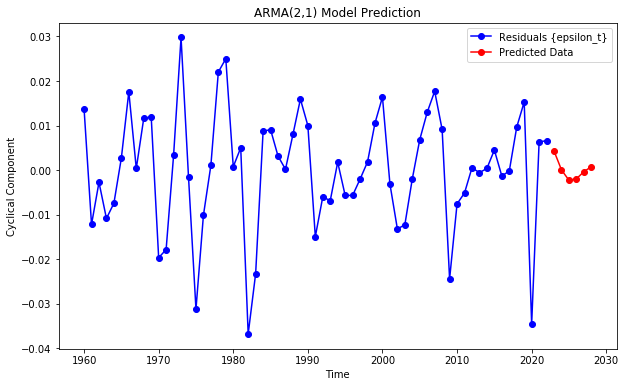

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(gdp_segr['YEARS'],gdp_segr['epsilon_t'], marker='o', linestyle='-', color='b', label='Residuals {epsilon_t}')
plt.plot(predicted_values['year'],predicted_values[0], label='Predicted Data',marker='o', color='red')
plt.legend()
plt.title('ARMA(2,1) Model Prediction')
plt.xlabel('Time')
plt.ylabel('Cyclical Component')
plt.show()